In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

trainset = torchvision.datasets.STL10(root='./data', split = 'train', transform = transform, download = True)
testset = torchvision.datasets.STL10(root='./data', split = 'test', transform = transform, download = True)

batchSize = 32
train_loader = DataLoader(trainset, batch_size = batchSize, shuffle = True, drop_last = True)
test_loader = DataLoader(trainset, batch_size = testset.data.shape[0])

Files already downloaded and verified
Files already downloaded and verified


In [13]:
print(train_loader.dataset.classes)
print(np.min(testset.data), np.max(testset.data))
print(trainset.data.shape)
print(testset.data.shape)

['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']
0 255
(5000, 3, 96, 96)
(8000, 3, 96, 96)


In [14]:
X, y = next(iter(train_loader))
print(X.data.shape)
print(torch.min(X.data), torch.max(X.data))

torch.Size([32, 3, 96, 96])
tensor(-2.1179) tensor(2.6400)


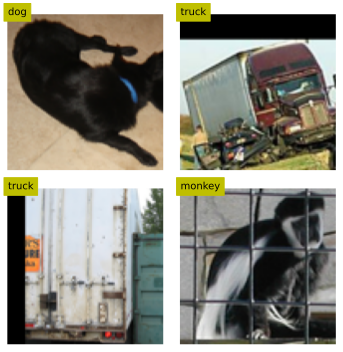

In [34]:
fig, axs = plt.subplots(2, 2, figsize = (5, 5))
for idx, ax in enumerate(axs.flatten()):
  randinx = np.random.choice(trainset.data.shape[0])
  img = trainset.data[randinx].transpose([1, 2, 0])
  ax.imshow(img)
  ax.text(0, 0, train_loader.dataset.classes[train_loader.dataset[randinx][1]], backgroundcolor = 'y')
  ax.axis('off')

plt.tight_layout()
plt.show()

In [44]:
resnet = torchvision.models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1')

In [39]:
from torchsummary import summary
summary(resnet.to(device), (3, 96, 96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 48, 48]           9,408
       BatchNorm2d-2           [-1, 64, 48, 48]             128
              ReLU-3           [-1, 64, 48, 48]               0
         MaxPool2d-4           [-1, 64, 24, 24]               0
            Conv2d-5           [-1, 64, 24, 24]          36,864
       BatchNorm2d-6           [-1, 64, 24, 24]             128
              ReLU-7           [-1, 64, 24, 24]               0
            Conv2d-8           [-1, 64, 24, 24]          36,864
       BatchNorm2d-9           [-1, 64, 24, 24]             128
             ReLU-10           [-1, 64, 24, 24]               0
       BasicBlock-11           [-1, 64, 24, 24]               0
           Conv2d-12           [-1, 64, 24, 24]          36,864
      BatchNorm2d-13           [-1, 64, 24, 24]             128
             ReLU-14           [-1, 64,

In [40]:
for p in resnet.parameters():
  p.requires_grad = False

In [46]:
resnet.fc = nn.Linear(512, 10)

In [47]:
summary(resnet.to(device), (3, 96, 96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 48, 48]           9,408
       BatchNorm2d-2           [-1, 64, 48, 48]             128
              ReLU-3           [-1, 64, 48, 48]               0
         MaxPool2d-4           [-1, 64, 24, 24]               0
            Conv2d-5           [-1, 64, 24, 24]          36,864
       BatchNorm2d-6           [-1, 64, 24, 24]             128
              ReLU-7           [-1, 64, 24, 24]               0
            Conv2d-8           [-1, 64, 24, 24]          36,864
       BatchNorm2d-9           [-1, 64, 24, 24]             128
             ReLU-10           [-1, 64, 24, 24]               0
       BasicBlock-11           [-1, 64, 24, 24]               0
           Conv2d-12           [-1, 64, 24, 24]          36,864
      BatchNorm2d-13           [-1, 64, 24, 24]             128
             ReLU-14           [-1, 64,

In [48]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [50]:
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(resnet.parameters(), lr = 0.001, momentum = 0.9)
resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [65]:
def function2trainTheModel():
  numepochs = 10

  trainAcc = torch.zeros(numepochs)
  testAcc = torch.zeros(numepochs)
  trainLoss = torch.zeros(numepochs)
  testLoss = torch.zeros(numepochs)

  for epoch in range(numepochs):
    resnet.train()
    batchAcc = []
    batchLoss = []
    for X, y in train_loader:
      X = X.to(device) 
      y = y.to(device)

      yHat = resnet(X)
      loss = lossfun(yHat, y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchLoss.append(loss.item())
      matches = (torch.argmax(yHat, axis = 1) == y).float()
      accuracy = torch.mean(matches).item()
      batchAcc.append(100 * accuracy)
    
    trainAcc[epoch] = np.mean(batchAcc)
    trainLoss[epoch] = np.mean(batchLoss)

    resnet.eval()
    X, y = next(iter(test_loader))
    X = X.to(device)
    y = y.to(device)
    with torch.no_grad():
      yHat = resnet(X)

    loss = lossfun(yHat, y)
    testLoss[epoch] = loss
    matches = ((torch.argmax(yHat, axis = 1) == y).float())
    accuracy = 100 * torch.mean(matches).item()
    testAcc[epoch] = accuracy
    print(f'Finished epoch {epoch+1}/{numepochs}. Test accuracy = {testAcc[epoch]:.2f}%')

  
  return trainLoss, testLoss, trainAcc, testAcc

In [66]:
trainLoss, testLoss, trainAcc, testAcc = function2trainTheModel()

Finished epoch 1/10. Test accuracy = 100.00%
Finished epoch 2/10. Test accuracy = 100.00%
Finished epoch 3/10. Test accuracy = 100.00%
Finished epoch 4/10. Test accuracy = 100.00%
Finished epoch 5/10. Test accuracy = 100.00%
Finished epoch 6/10. Test accuracy = 100.00%
Finished epoch 7/10. Test accuracy = 100.00%
Finished epoch 8/10. Test accuracy = 100.00%
Finished epoch 9/10. Test accuracy = 100.00%
Finished epoch 10/10. Test accuracy = 100.00%


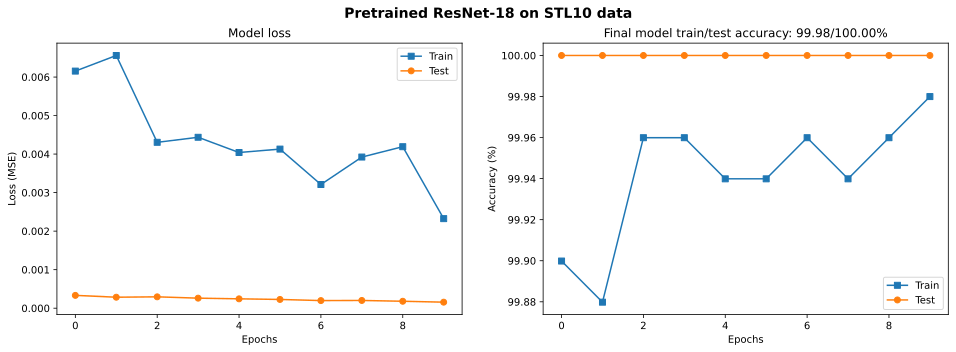

In [67]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(trainLoss,'s-',label='Train')
ax[0].plot(testLoss,'o-',label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss (MSE)')
ax[0].set_title('Model loss')
ax[0].legend()

ax[1].plot(trainAcc,'s-',label='Train')
ax[1].plot(testAcc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model train/test accuracy: {trainAcc[-1]:.2f}/{testAcc[-1]:.2f}%')
ax[1].legend()

plt.suptitle('Pretrained ResNet-18 on STL10 data',fontweight='bold',fontsize=14)
plt.show()

In [68]:
# inspect a few random images

X,y = next(iter(test_loader))
X = X.to(device)
y = y.to(device)
resnet.eval()
predictions = torch.argmax( resnet(X) ,axis=1)


fig,axs = plt.subplots(4,4,figsize=(10,10))

for (i,ax) in enumerate(axs.flatten()):

  # extract that image (need to transpose it back to 96x96x3)
  pic = X.data[i].cpu().numpy().transpose((1,2,0))
  pic = pic-np.min(pic) # undo normalization
  pic = pic/np.max(pic)
  
  # show the image
  ax.imshow(pic)
  
  
  # label and true class
  label = trainset.classes[predictions[i]]
  truec = trainset.classes[y[i]]
  title = f'Pred: {label}  -  true: {truec}'

  # set the title with color-coded accuracy
  titlecolor = 'g' if truec==label else 'r'
  ax.text(48,90,title,ha='center',va='top',fontweight='bold',color='k',backgroundcolor=titlecolor,fontsize=8)
  ax.axis('off')

plt.tight_layout()
plt.show()

OutOfMemoryError: ignored